<a href="https://colab.research.google.com/github/vivekrrg/FarmAssistantFrontEnd/blob/main/fyp_base_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing libraries

from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [ ]:
 
df = pd.read_csv('Crop_recommendation.csv')

In [ ]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [ ]:
df.size

17600

In [ ]:
df.shape

(2200, 8)

In [ ]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [ ]:
arr=df['label'].unique()

In [ ]:
arr

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [ ]:
arr.size

22

In [ ]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [ ]:
df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

<Axes: >

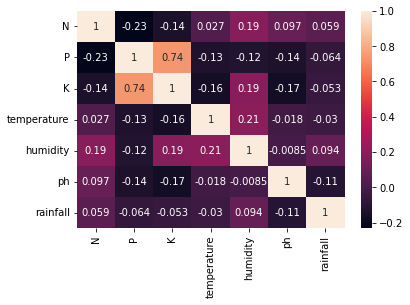

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
labels = df['label']

In [ ]:
# Initializing empty lists to append all model's name and corresponding name
acc = []
model = []

In [ ]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.3,random_state =2)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  85.9090909090909
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        26
   blackgram       0.65      1.00      0.79        28
    chickpea       1.00      1.00      1.00        29
     coconut       0.94      1.00      0.97        31
      coffee       1.00      1.00      1.00        33
      cotton       1.00      0.97      0.98        31
      grapes       1.00      1.00      1.00        29
        jute       0.50      0.03      0.06        33
 kidneybeans       0.00      0.00      0.00        30
      lentil       0.63      1.00      0.77        32
       maize       0.97      1.00      0.98        32
       mango       1.00      1.00      1.00        33
   mothbeans       0.00      0.00      0.00        29
    mungbean       1.00      1.00      1.00        32
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1.00 

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target,cv=5)

In [ ]:
score

array([0.93636364, 0.90909091, 0.91818182, 0.87045455, 0.93636364])

In [ ]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
DT_pkl_filename = 'DecisionTree.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

In [ ]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.9924242424242424
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        26
   blackgram       1.00      1.00      1.00        28
    chickpea       1.00      1.00      1.00        29
     coconut       1.00      1.00      1.00        31
      coffee       1.00      1.00      1.00        33
      cotton       1.00      1.00      1.00        31
      grapes       1.00      1.00      1.00        29
        jute       0.89      0.97      0.93        33
 kidneybeans       1.00      1.00      1.00        30
      lentil       1.00      1.00      1.00        32
       maize       1.00      1.00      1.00        32
       mango       1.00      1.00      1.00        33
   mothbeans       1.00      1.00      1.00        29
    mungbean       1.00      1.00      1.00        32
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1.00 

In [ ]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99545455, 0.99545455, 0.99090909])

In [ ]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
NB_pkl_filename = 'NBClassifier.pkl'
# Open the file to save as pkl file
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
# Close the pickle instances
NB_Model_pkl.close()

In [ ]:
from sklearn.svm import SVC

SVM = SVC(gamma='auto')

SVM.fit(Xtrain,Ytrain)

predicted_values = SVM.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.07272727272727272
              precision    recall  f1-score   support

       apple       1.00      0.11      0.19        28
      banana       1.00      0.12      0.21        26
   blackgram       1.00      0.07      0.13        28
    chickpea       1.00      0.03      0.07        29
     coconut       0.00      0.00      0.00        31
      coffee       0.00      0.00      0.00        33
      cotton       1.00      0.06      0.12        31
      grapes       0.00      0.00      0.00        29
        jute       0.00      0.00      0.00        33
 kidneybeans       1.00      0.03      0.06        30
      lentil       0.00      0.00      0.00        32
       maize       0.00      0.00      0.00        32
       mango       0.00      0.00      0.00        33
   mothbeans       0.00      0.00      0.00        29
    mungbean       1.00      0.06      0.12        32
   muskmelon       1.00      0.27      0.42        30
      orange       1.00      0.02      0.

In [ ]:
#  Cross validation score (SVM)
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.27727273, 0.28863636, 0.29090909, 0.275     , 0.26818182])

In [ ]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.9621212121212122
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        26
   blackgram       0.92      0.82      0.87        28
    chickpea       1.00      1.00      1.00        29
     coconut       1.00      1.00      1.00        31
      coffee       1.00      1.00      1.00        33
      cotton       0.91      0.94      0.92        31
      grapes       1.00      1.00      1.00        29
        jute       0.86      0.94      0.90        33
 kidneybeans       0.97      1.00      0.98        30
      lentil       0.91      1.00      0.96        32
       maize       0.94      0.91      0.92        32
       mango       0.97      1.00      0.99        33
   mothbeans       0.83      0.83      0.83        29
    mungbean       1.00      1.00      1.00        32
   muskmelon       1.00      1.00      1.00        30
      orange       1.00   

In [ ]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv=5)
score

array([0.95      , 0.96590909, 0.94772727, 0.96590909, 0.94318182])

In [ ]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
LR_pkl_filename = 'LogisticRegression.pkl'
# Open the file to save as pkl file
LR_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(LogReg, LR_Model_pkl)
# Close the pickle instances
LR_Model_pkl.close()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.9893939393939394
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        26
   blackgram       0.97      1.00      0.98        28
    chickpea       1.00      1.00      1.00        29
     coconut       1.00      1.00      1.00        31
      coffee       1.00      1.00      1.00        33
      cotton       1.00      1.00      1.00        31
      grapes       1.00      1.00      1.00        29
        jute       0.89      0.94      0.91        33
 kidneybeans       1.00      1.00      1.00        30
      lentil       1.00      1.00      1.00        32
       maize       1.00      1.00      1.00        32
       mango       1.00      1.00      1.00        33
   mothbeans       1.00      0.97      0.98        29
    mungbean       1.00      1.00      1.00        32
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1.00      1.00

In [ ]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99772727, 0.99318182, 0.98863636])

In [ ]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = 'RandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

In [ ]:
import xgboost as xgb
#pip install 'scikit-learn==0.15'
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(Ytrain)
XB = xgb.XGBClassifier()
XB.fit(Xtrain,y_train)
 

y_pred = XB.predict(Xtest)
y_pred = le.inverse_transform(y_pred)

x = metrics.accuracy_score(Ytest, y_pred)
acc.append(x)

In [ ]:
model.append('XGBoost')
print("XGBoost's Accuracy is: ", x)

print(classification_report(Ytest.astype(str) , y_pred.astype(str)))

XGBoost's Accuracy is:  0.9954545454545455
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        26
   blackgram       1.00      1.00      1.00        28
    chickpea       1.00      1.00      1.00        29
     coconut       1.00      1.00      1.00        31
      coffee       0.97      1.00      0.99        33
      cotton       1.00      1.00      1.00        31
      grapes       1.00      1.00      1.00        29
        jute       1.00      0.91      0.95        33
 kidneybeans       1.00      1.00      1.00        30
      lentil       1.00      1.00      1.00        32
       maize       1.00      1.00      1.00        32
       mango       1.00      1.00      1.00        33
   mothbeans       1.00      1.00      1.00        29
    mungbean       1.00      1.00      1.00        32
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1.00     

In [ ]:
# Cross validation score (XGBoost)
XB_target=le.fit_transform(target)
score = cross_val_score(XB, features, XB_target, cv=5)
score

In [ ]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
XB_pkl_filename = 'XGBoost.pkl'
# Open the file to save as pkl file
XB_Model_pkl = open(XB_pkl_filename, 'wb')
pickle.dump(XB, XB_Model_pkl)
# Close the pickle instances
XB_Model_pkl.close()

In [ ]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [ ]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

In [ ]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = RF.predict(data)
print(prediction)

In [ ]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
prediction = RF.predict(data)
print(prediction)

Max Voting


The max voting method is generally used for classification problems. In this technique, multiple models are used to make predictions for each data point. The predictions by each model are considered as a ‘vote’. The predictions which we get from the majority of the models are used as the final prediction.

For example, when you asked 5 of your colleagues to rate your movie (out of 5); we’ll assume three of them rated it as 4 while two of them gave it a 5. Since the majority gave a rating of 4, the final rating will be taken as 4. You can consider this as taking the mode of all the predictions.

In [ ]:
from sklearn.ensemble import VotingClassifier
model1 = LogisticRegression(random_state=1)
model2 = tree.DecisionTreeClassifier(random_state=1)
model = VotingClassifier(estimators=[('lr', model1), ('dt', model2)], voting='hard')
model.fit(Xtrain,Ytrain)
model.score(Xtest,Ytest)

In [ ]:
from sklearn.ensemble import VotingClassifier
model1 = RandomForestClassifier(random_state=1)
model2 = tree.DecisionTreeClassifier(random_state=1)
model = VotingClassifier(estimators=[('lr', model1), ('dt', model2)], voting='hard')
model.fit(Xtrain,Ytrain)
model.score(Xtest,Ytest)

In [ ]:
from sklearn.ensemble import VotingClassifier
model1 = RandomForestClassifier(random_state=1)
model2 =SVC(gamma='auto')
model = VotingClassifier(estimators=[('lr', model1), ('dt', model2)], voting='hard')
model.fit(Xtrain,Ytrain)
model.score(Xtest,Ytest)

In [ ]:
from sklearn.ensemble import VotingClassifier
model1 = RandomForestClassifier(random_state=1)
model2 =GaussianNB()
model = VotingClassifier(estimators=[('lr', model1), ('dt', model2)], voting='hard')
model.fit(Xtrain,Ytrain)
model.score(Xtest,Ytest)

In [ ]:
from sklearn.ensemble import VotingClassifier
model1 = RandomForestClassifier(random_state=1)
model2 = LogisticRegression(random_state=1)
model = VotingClassifier(estimators=[('lr', model1), ('dt', model2)], voting='hard')
model.fit(Xtrain,Ytrain)
model.score(Xtest,Ytest)

In [ ]:
from sklearn.ensemble import VotingClassifier
model1 = GaussianNB()
model2 = LogisticRegression(random_state=1)
model = VotingClassifier(estimators=[('lr', model1), ('dt', model2)], voting='hard')
model.fit(Xtrain,Ytrain)
model.score(Xtest,Ytest)

In [ ]:
from sklearn.ensemble import VotingClassifier
model1 = SVC(gamma='auto')
model2 = LogisticRegression(random_state=1)
model = VotingClassifier(estimators=[('lr', model1), ('dt', model2)], voting='hard')
model.fit(Xtrain,Ytrain)
model.score(Xtest,Ytest)

In [ ]:
from sklearn.ensemble import VotingClassifier
model1 = SVC(gamma='auto')
model2 = GaussianNB()
model = VotingClassifier(estimators=[('lr', model1), ('dt', model2)], voting='hard')
model.fit(Xtrain,Ytrain)
model.score(Xtest,Ytest)

In [ ]:
from sklearn.ensemble import VotingClassifier
model1 = SVC(gamma='auto')
model2 = tree.DecisionTreeClassifier(random_state=1)
model = VotingClassifier(estimators=[('lr', model1), ('dt', model2)], voting='hard')
model.fit(Xtrain,Ytrain)
model.score(Xtest,Ytest)

In [ ]:
from sklearn.ensemble import VotingClassifier
model1 = GaussianNB()
model2 = tree.DecisionTreeClassifier(random_state=1)
model = VotingClassifier(estimators=[('lr', model1), ('dt', model2)], voting='hard')
model.fit(Xtrain,Ytrain)
model.score(Xtest,Ytest)

Averaging


Similar to the max voting technique, multiple predictions are made for each data point in averaging. In this method, we take an average of predictions from all the models and use it to make the final prediction. Averaging can be used for making predictions in regression problems or while calculating probabilities for classification problems.

For example, in the below case, the averaging method would take the average of all the values.

i.e. (5+4+5+4+4)/5 = 4.4

In [ ]:
model1 = tree.DecisionTreeClassifier()
model2 = RandomForestClassifier(random_state=1)
model3= LogisticRegression()

model1.fit(Xtrain,Ytrain)
model2.fit(Xtrain,Ytrain)
model3.fit(Xtrain,Ytrain)

pred1=model1.predict_proba(Xtest)
pred2=model2.predict_proba(Xtest)
pred3=model3.predict_proba(Xtest)

finalpred1=(pred1+pred2+pred3)/3

In [ ]:
model1 = tree.DecisionTreeClassifier()
model2 =  GaussianNB()
model3= LogisticRegression()

model1.fit(Xtrain,Ytrain)
model2.fit(Xtrain,Ytrain)
model3.fit(Xtrain,Ytrain)

pred1=model1.predict_proba(Xtest)
pred2=model2.predict_proba(Xtest)
pred3=model3.predict_proba(Xtest)

finalpred1=(pred1+pred2+pred3)/3

In [ ]:
model1 = tree.DecisionTreeClassifier()
model2 =  GaussianNB()
model3= LogisticRegression()

model1.fit(Xtrain,Ytrain)
model2.fit(Xtrain,Ytrain)
model3.fit(Xtrain,Ytrain)

pred1=model1.predict_proba(Xtest)
pred2=model2.predict_proba(Xtest)
pred3=model3.predict_proba(Xtest)

finalpred1=(pred1+pred2+pred3)/3

In [ ]:
model1 = tree.DecisionTreeClassifier()
model2 =  xgb.XGBClassifier()
model3= LogisticRegression()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(Ytrain)
model1.fit(Xtrain,Ytrain)
model2.fit(Xtrain,y_train)
model3.fit(Xtrain,Ytrain)

pred1=model1.predict_proba(Xtest)
pred2=model2.predict_proba(Xtest)
pred3=model3.predict_proba(Xtest)

finalpred1=(pred1+pred2+pred3)/3

In [ ]:
model1 = tree.DecisionTreeClassifier()
model2 =  xgb.XGBClassifier()
model3= RandomForestClassifier(random_state=1)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(Ytrain)
model1.fit(Xtrain,Ytrain)
model2.fit(Xtrain,y_train)
model3.fit(Xtrain,Ytrain)

pred1=model1.predict_proba(Xtest)
pred2=model2.predict_proba(Xtest)
pred3=model3.predict_proba(Xtest)

finalpred1=(pred1+pred2+pred3)/3

Taking two models then predicting its value then validating it with use of third model . 



We’ll build two models, decision tree and random forest , on the train set in order to make predictions on the validation set.

In [ ]:
from sklearn.model_selection import StratifiedKFold
def Stacking(model,train,y,test,n_fold):
   folds=StratifiedKFold(n_splits=n_fold,random_state=1)
   test_pred=np.empty((test.shape[0],1),float)
   train_pred=np.empty((0,1),float)
   for train_indices,val_indices in folds.split(train,y.values):
      Xtrain,x_val=train.iloc[train_indices],train.iloc[val_indices]
      Ytrain,y_val=y.iloc[train_indices],y.iloc[val_indices]

      model.fit(X=Xtrain,y=Ytrain)
      train_pred=np.append(train_pred,model.predict(x_val))
      test_pred=np.append(test_pred,model.predict(test))
   return test_pred.reshape(-1,1), train_pred

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model1 = tree.DecisionTreeClassifier()
model1.fit(Xtrain, Ytrain)
val_pred1=model1.predict(Xtrain)
test_pred1=model1.predict(Xtest)
val_pred1=pd.DataFrame(val_pred1)
test_pred1=pd.DataFrame(test_pred1)

model2 = KNeighborsClassifier()
model2.fit(Xtrain,Ytrain)
val_pred2=model2.predict(Xtrain)
test_pred2=model2.predict(Xtest)
val_pred2=pd.DataFrame(val_pred2)
test_pred2=pd.DataFrame(test_pred2)

In [113]:
from sklearn.linear_model import LogisticRegression
df_val=pd.concat([Xtrain, val_pred1,val_pred2],axis=1)
df_test=pd.concat([Xtest, test_pred1,test_pred2],axis=1)
LYtrain=Ytrain
LYtrain= Ytrain.astype(str)
model = LogisticRegression()
model.fit(df_val,LYtrain)
model.score(df_test,Ytest)

TypeError: ignored